## Parte 0: Preparar los datos

Descargamos los datos de http://www.amstat.org/publications/jse/v2n1/datasets.mcintyre.html.

In [1]:
import urllib.request
urllib.request.urlretrieve("http://www.amstat.org/publications/jse/datasets/cigarettes.dat.txt", "cigarettes.dat")

('cigarettes.dat', <http.client.HTTPMessage at 0x7f44c80625c0>)

In [2]:
!wc -l cigarettes.dat

25 cigarettes.dat


In [3]:
cat cigarettes.dat

Alpine 		14.1  .86  .9853  13.6
Benson&Hedges	16.0 1.06 1.0938  16.6
BullDurham	29.8 2.03 1.1650  23.5
CamelLights	 8.0  .67  .9280  10.2
Carlton		 4.1  .40  .9462   5.4
Chesterfield	15.0 1.04  .8885  15.0
GoldenLights	 8.8  .76 1.0267   9.0
Kent		12.4  .95  .9225  12.3
Kool		16.6 1.12  .9372  16.3
L&M		14.9 1.02  .8858  15.4
LarkLights	13.7 1.01  .9643  13.0
Marlboro	15.1  .90  .9316  14.4
Merit		 7.8  .57  .9705  10.0
MultiFilter	11.4  .78 1.1240  10.2
NewportLights	 9.0  .74  .8517   9.5
Now		 1.0  .13  .7851   1.5
OldGold		17.0 1.26  .9186  18.5
PallMallLight	12.8 1.08 1.0395  12.6
Raleigh		15.8  .96  .9573  17.5
SalemUltra	 4.5  .42  .9106   4.9
Tareyton	14.5 1.01 1.0070  15.9
True		 7.3  .61  .9806   8.5
ViceroyRichLight 8.6  .69  .9693  10.6
VirginiaSlims	15.2 1.02  .9496  13.9
WinstonLights	12.0 .82  1.1184  14.9


Vamos a cargar los en Python con pandas. pandas es una biblioteca de Python para trabajar con tablas de datos (llamados `DataFrames`) de forma cómoda. En Pybonacci escribimos un [tutorial de pandas](http://pybonacci.org/2014/05/30/pandas-i/) desde lo más básico a usos un poco más intermedios.

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("cigarettes.dat", delim_whitespace=True, header=None,
                 names=["Marca", "Alquitrán", "Nicotina", "Peso", "Monóxido"])
df.head()

,Marca,Alquitrán,Nicotina,Peso,Monóxido
0,Alpine,14.1,0.86,0.9853,13.6
1,Benson&Hedges,16.0,1.06,1.0938,16.6
2,BullDurham,29.8,2.03,1.1650,23.5
3,CamelLights,8.0,0.67,0.9280,10.2
4,Carlton,4.1,0.40,0.9462,5.4


Además, vamos a añadir el tipo de cigarro para que la tabla quede como la presentada en el curso.

In [6]:
df["Clases"] = ['Rubio', 'Negro', 'Negro', 'Rubio', 'Rubio',
                'Negro', 'Rubio', 'Rubio', 'Negro', 'Rubio',
                'Rubio', 'Rubio', 'Rubio', 'Rubio', 'Rubio',
                'Rubio', 'Negro', 'Rubio', 'Negro', 'Rubio',
                'Negro', 'Rubio', 'Negro', 'Negro', 'Rubio']

In [7]:
df[["Clases", "Alquitrán", "Nicotina", "Peso", "Monóxido"]]

,Clases,Alquitrán,Nicotina,Peso,Monóxido
0,Rubio,14.1,0.86,0.9853,13.6
1,Negro,16.0,1.06,1.0938,16.6
2,Negro,29.8,2.03,1.1650,23.5
3,Rubio,8.0,0.67,0.9280,10.2
4,Rubio,4.1,0.40,0.9462,5.4
5,Negro,15.0,1.04,0.8885,15.0
6,Rubio,8.8,0.76,1.0267,9.0
7,Rubio,12.4,0.95,0.9225,12.3
8,Negro,16.6,1.12,0.9372,16.3
9,Rubio,14.9,1.02,0.8858,15.4


## Parte 1: Informe estadístico

Los `DataFrame` de pandas tienen un método `describe()` que imprime algunas medidas estadísticas interesantes de nuestra tabla:

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alquitrán,25,12.216000,5.665810,1.0000,8.6000,12.8000,15.100,29.800
Nicotina,25,0.876400,0.354058,0.1300,0.6900,0.9000,1.020,2.030
Peso,25,0.970284,0.087721,0.7851,0.9225,0.9573,1.007,1.165
Monóxido,25,12.528000,4.739684,1.5000,10.0000,13.0000,15.400,23.500


Podemos añadir también el **error estándar de la media** y la **varianza**:

In [9]:
df.sem()

Alquitrán    1.133162
Nicotina     0.070812
Peso         0.017544
Monóxido     0.947937
dtype: float64

In [10]:
df.var()

Alquitrán    32.101400
Nicotina      0.125357
Peso          0.007695
Monóxido     22.464600
dtype: float64

Por tanto, contestando a las preguntas del informe:

> 1) El **tamaño muestral** es de 25.
>
> 2) La **variable con mayor variabilidad** es el **alquitrán**: se aprecia mejor en la tabla de la varianza.
>
> 3) La **media más representativa de los datos** es la del **peso**: el error estándar de la media es el menor de las cuatro variables.
>
> 4) La **media más estable** es la del peso, por lo mismo que se ha dicho en el apartado anterior.

## Parte 2: Analizar los percentiles

Ahora volvemos a utilizar el método `describe()` pero esta vez especificamos manualmente los percentiles, seleccionamos solo las columnas que nos interesan y presentamos la tabla:

In [11]:
(df.describe(percentiles=[.05, .10, .25, .50, .75, .90, .95])
 [["Monóxido", "Alquitrán", "Nicotina", "Peso"]]
 .transpose()
 [["5%", "10%", "25%", "50%", "75%", "90%", "95%"]])

,5%,10%,25%,50%,75%,90%,95%
Monóxido,5.00000,6.64000,10.0000,13.0000,15.400,17.14000,18.30000
Alquitrán,4.18000,5.62000,8.6000,12.8000,15.100,16.36000,16.92000
Nicotina,0.40400,0.48000,0.6900,0.9000,1.020,1.10400,1.23200
Peso,0.85852,0.88688,0.9225,0.9573,1.007,1.10856,1.12288


Recuperamos además la mediana y el recorrido intercuartílico:

In [12]:
df.median()

Alquitrán    12.8000
Nicotina      0.9000
Peso          0.9573
Monóxido     13.0000
dtype: float64

In [13]:
iqr = df.quantile(.75) - df.quantile(.25)
iqr

Alquitrán    6.5000
Nicotina     0.3300
Peso         0.0845
Monóxido     5.4000
dtype: float64

> Observamos una gran variabilidad de los contenidos de alquitrán y monóxido de carbono, mientras que las cantidades de nicotina son más estables y el peso de los cigarrillos prácticamente no cambia. Los resultados son similares a los obtenidos estudiando la media y su dispersión.

## Parte 3: Box plots

Por último, [utilizamos la biblioteca matplotlib para representar los diagramas de cajas](http://pybonacci.org/2012/06/04/manual-de-introduccion-a-matplotlib-pyplot-iv-tipos-de-grafico-i/). Por defecto son de [tipo Tukey](http://www.wikiwand.com/en/Box_plot), es decir: los bigotes llegan hasta 1.5 veces el recorrido intercuartílico por encima del percentil 75 y por debajo del percentil 25.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

(0, 1.2)

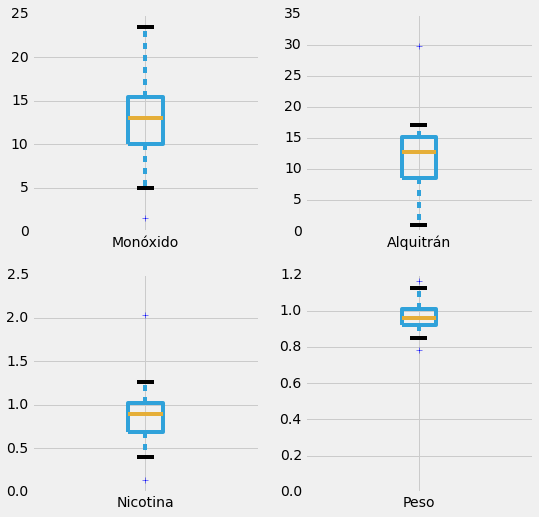

In [15]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
df.boxplot("Monóxido", return_type='axes')

plt.subplot(2, 2, 2)
df.boxplot("Alquitrán", return_type='axes')
plt.ylim(0, 35)  # Para ver una medida discordante

plt.subplot(2, 2, 3)
df.boxplot("Nicotina", return_type='axes')

plt.subplot(2, 2, 4)
df.boxplot("Peso", return_type='axes')
plt.ylim(0, 1.20)  # Importante

> Tanto el monóxido como el peso presentan distribuciones bastante simétricas, mientras que el alquitrán tiene un claro [sesgo positivo](https://es.wikipedia.org/wiki/Archivo:Posiciones_relativas_de_par%C3%A1metros_centrales.svg). Especial atención merece el peso en este caso, pues una correcta escala vertical es esencial para no percibir una variabilidad errónea. Tanto en los datos de nicotina como en los de alquitrán se aprecian sendos valores discordantes, que invitarían a no comprar esa marca de cigarrillos.

In [16]:
df[df["Alquitrán"] > df["Alquitrán"].quantile(.75) + 1.5 * iqr["Alquitrán"]]

,Marca,Alquitrán,Nicotina,Peso,Monóxido,Clases
2,BullDurham,29.8,2.03,1.165,23.5,Negro
